In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import geopandas as gpd

In [3]:
map_df = gpd.read_file('../src_data/us_county_mainland/us_county.shp')

In [7]:
simu_case_df = pd.read_csv('county_w_init_180/simu_3.csv')
simu_case_df['GeoId'] = simu_case_df['cbg'].apply(lambda x: '%05d'%x)
simu_case_df = simu_case_df.iloc[::-1].reset_index(drop=True)
simu_case_df['total infected'] = simu_case_df['infectious'] + simu_case_df['recovered']
simu_case_df['total percent infected'] = simu_case_df['total infected'] / (simu_case_df['total infected'] + simu_case_df['susceptible'])
simu_case_df =  simu_case_df.sort_values(by = 'day', ascending=True)

In [8]:
single_day_df = simu_case_df[simu_case_df['day'] == 2]
single_day_df.drop_duplicates(subset=['cbg'])

,day,cbg,susceptible,infectious,recovered,GeoId,total infected,total percent infected
2093185,2,4013,4333799,11,0,04013,11,2.538182e-06
2093183,2,17031,5205263,12,0,17031,12,2.305354e-06
2093186,2,6073,3319072,1,0,06073,1,3.012889e-07


In [26]:
def plot_day(i):
    fig, ax = plt.subplots(figsize = (10,10))
    plot_day_df = simu_case_df[simu_case_df['day'] == i]
    plot_day_df = plot_day_df.drop_duplicates(subset=['cbg'])
    prob_map_df = map_df.merge(plot_day_df, left_on='GEOID', right_on='GeoId', how = 'left').fillna(0)
    prob_map_df.plot(column='total percinfected', cmap='Blues', ax = ax, linewidth = 0.1, legend=False)
    ax.axis('off')

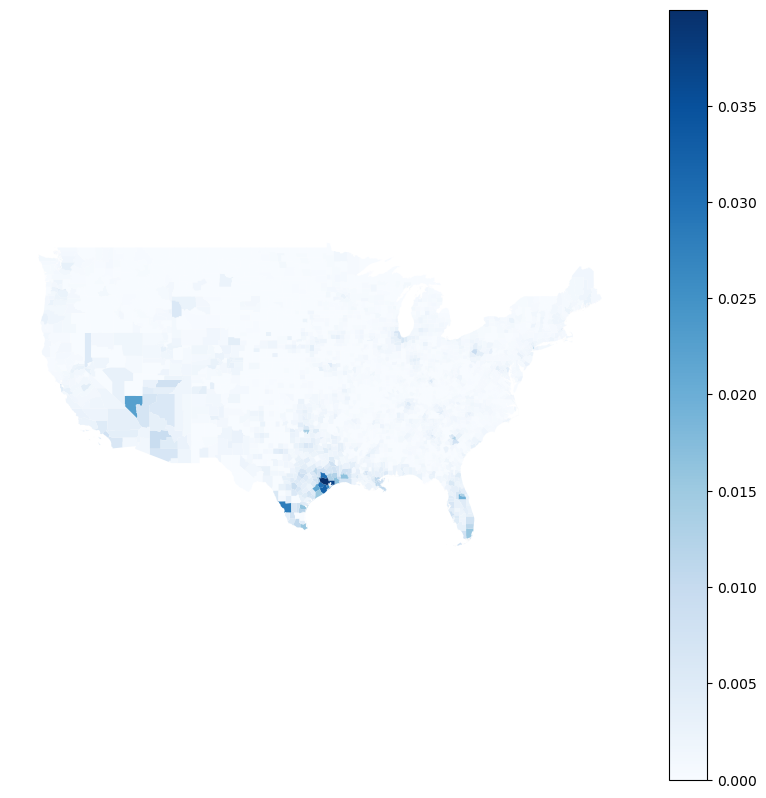

In [28]:
plot_day(180)

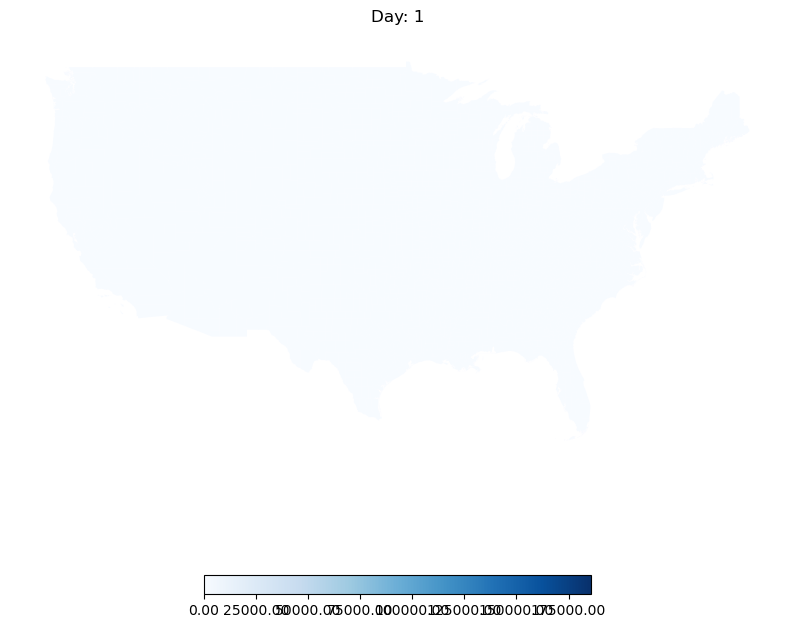

In [10]:
fig, ax = plt.subplots(figsize = (10,10))

norm = plt.Normalize(vmin=0, vmax=simu_case_df['total infected'].max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])  # Only needed for adding the colorbar
colorbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, format='%.2f')

def animate(i):
    ax.clear()
    plot_day_df = simu_case_df[simu_case_df['day'] == (i+1)]
    plot_day_df = plot_day_df.drop_duplicates(subset=['cbg'])
    prob_map_df = map_df.merge(plot_day_df, left_on='GEOID', right_on='GeoId', how = 'left').fillna(0)
    prob_map_df.plot(column='total infected', cmap='Blues', ax = ax, linewidth = 0.1, legend=False)
    ax.axis('off')
    ax.annotate(f'Day: {i+1}', xy=(0.5, 1.05), xycoords='axes fraction', fontsize=12, ha='center')
ani = animation.FuncAnimation(fig, animate, frames=180, repeat=False, interval=1000)
ani.save('simu_case_cases.mp4', writer='ffmpeg', fps=2)

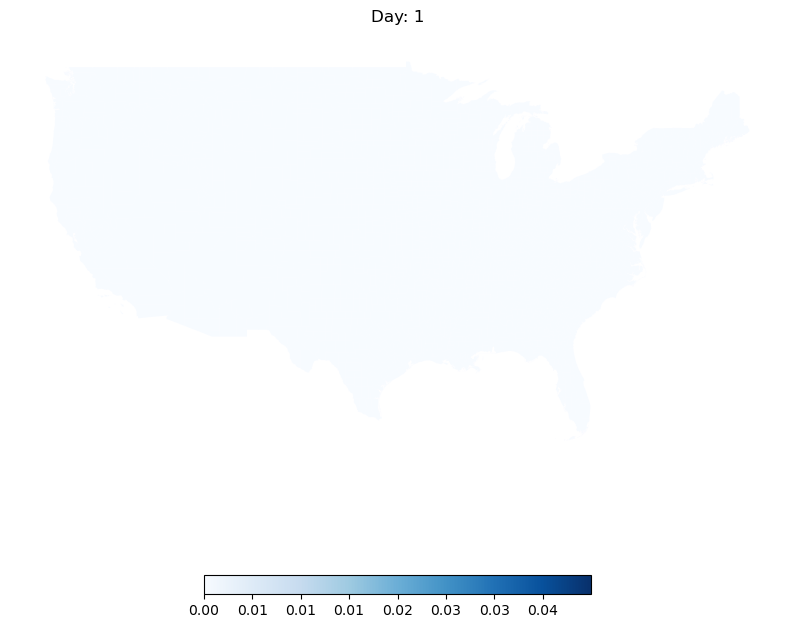

In [12]:
fig, ax = plt.subplots(figsize = (10,10))

norm = plt.Normalize(vmin=0, vmax=simu_case_df['total percent infected'].max())
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])  # Only needed for adding the colorbar
colorbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.5, format='%.2f')

def animate(i):
    ax.clear()
    plot_day_df = simu_case_df[simu_case_df['day'] == (i+1)]
    plot_day_df = plot_day_df.drop_duplicates(subset=['cbg'])
    prob_map_df = map_df.merge(plot_day_df, left_on='GEOID', right_on='GeoId', how = 'left').fillna(0)
    prob_map_df.plot(column='total percent infected', cmap='Blues', ax = ax, linewidth = 0.1, legend=False, norm = norm)
    ax.axis('off')
    ax.annotate(f'Day: {i+1}', xy=(0.5, 1.05), xycoords='axes fraction', fontsize=12, ha='center')
ani = animation.FuncAnimation(fig, animate, frames=180, repeat=False, interval=1000)
ani.save('simu_percent_cases.mp4', writer='ffmpeg', fps=2)